In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
#Load the data set
def read_data(path):
    data = pd.read_excel(path)
    return data

In [3]:
url=r"D:\Topmentor\Oct\29th oct\Toyota\ToyotaCorolla.xlsx"
df = read_data(url)

In [4]:
# Display the first few rows of the dataset
print(df.head())
print("---------------------------------")

# Display information about the dataset
print(df.info())


   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441 

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64


In [7]:
### Preprocessing and Feature Engineering
df_copy = df.copy()
print(df_copy)

        Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   9

#### Exploratory Data Analysis (EDA):

In [8]:
#Explore the dataset to understand its structure and relationships.

In [9]:
# Select relevant columns
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
data = df_copy[selected_columns]

In [55]:
# Function to remove outliers based on IQR
#def remove_outliers_iqr(df, cols):
 #   for col in cols:
  #      Q1 = df[col].quantile(0.25)
   #     Q3 = df[col].quantile(0.75)
    #    IQR = Q3 - Q1
     #   lower_bound = Q1 - 1.5 * IQR
      #  upper_bound = Q3 + 1.5 * IQR
       # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
 #   return df

# Remove outliers
#df_no_outliers = remove_outliers_iqr(data, selected_columns)

# Check the shape before and after removing outliers
#print(f"Original Data Shape: {data.shape}")
#print(f"Data Shape after Removing Outliers: {df_no_outliers.shape}")

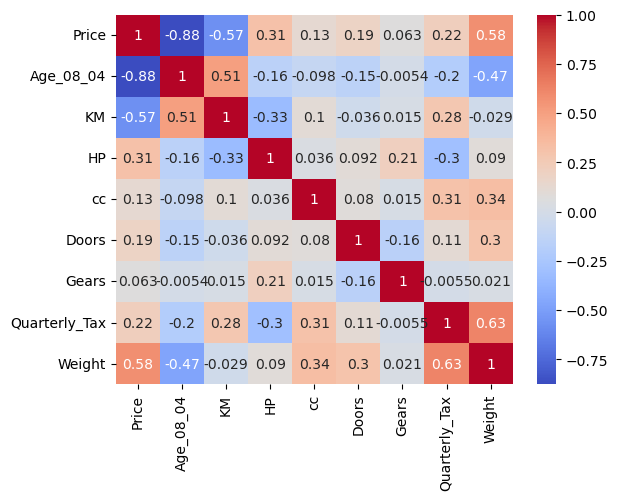

Interpretation:
	 The correlation matrix provides insights into the linear relationships between features and the target variable.
	 Features like Age, KM, HP, cc, Quarterly_Tax, and Weight show noticeable correlations with the target variable, while Doors and Gears have weaker correlations.
	 This information can guide feature selection and understanding of which features may have a stronger impact on predicting car prices


In [56]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

print("Interpretation:\n\t The correlation matrix provides insights into the linear relationships between features and the target variable.\n\t Features like Age, KM, HP, cc, Quarterly_Tax, and Weight show noticeable correlations with the target variable, while Doors and Gears have weaker correlations.\n\t This information can guide feature selection and understanding of which features may have a stronger impact on predicting car prices")

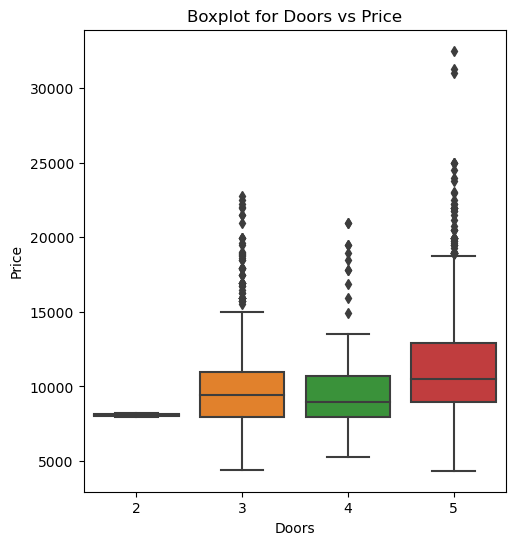



The number of doors seems to be a factor influencing the price of cars, with 4-door cars generally having a higher median price


In [57]:
# Boxplot for Doors and Gears
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Doors', y='Price', data=data)
plt.title('Boxplot for Doors vs Price')

plt.show()
print("\n\nThe number of doors seems to be a factor influencing the price of cars, with 4-door cars generally having a higher median price")

In [58]:
#Insight
print("Interpretation: \n\tCars with 4 doors have a wider range of prices compared to cars with 2 or 3 doors.\n\tThe median price for 4-door cars is relatively higher.\n\tThere are potential outliers in the 2-door and 3-door categories, indicating that some cars with fewer doors might have higher prices.")

Interpretation: 
	Cars with 4 doors have a wider range of prices compared to cars with 2 or 3 doors.
	The median price for 4-door cars is relatively higher.
	There are potential outliers in the 2-door and 3-door categories, indicating that some cars with fewer doors might have higher prices.


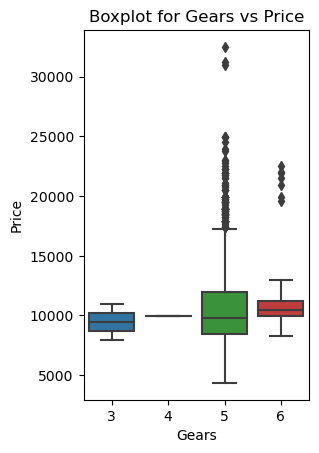


The number of gears might have some impact on the price, 
but other factors could also contribute to the variation in car prices within each gear category.


In [59]:
## Boxplot for Gears vs Price
plt.subplot(1, 2, 2)

sns.boxplot(x='Gears', y='Price', data=data)
plt.title('Boxplot for Gears vs Price')

plt.show()
print("\nThe number of gears might have some impact on the price, \nbut other factors could also contribute to the variation in car prices within each gear category.")

In [60]:
#Insight
print("Interpretation:\n\t Cars with 5 gears have a broader range of prices compared to cars with 4 gears.\n\t The median price for cars with 5 gears is slightly higher.\n\t There are potential outliers in both categories, suggesting that the number of gears alone may not be the sole determinant of a car's price.")

Interpretation:
	 Cars with 5 gears have a broader range of prices compared to cars with 4 gears.
	 The median price for cars with 5 gears is slightly higher.
	 There are potential outliers in both categories, suggesting that the number of gears alone may not be the sole determinant of a car's price.


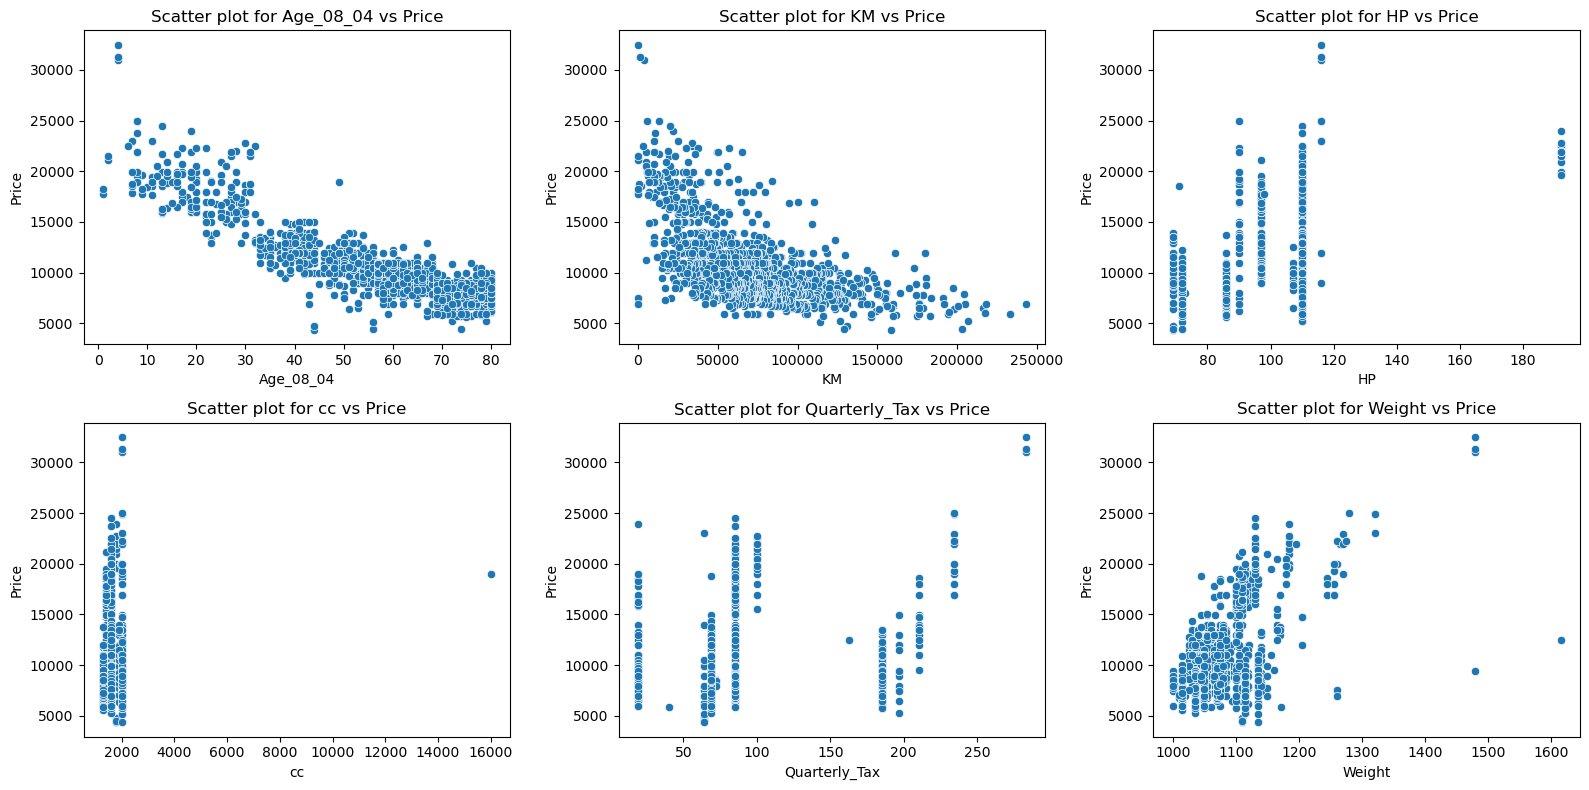

In [61]:
# Scatter plots for Age_08_04, KM, HP, cc, Quarterly_Tax, Weight
plt.figure(figsize=(16, 8))
for i, col in enumerate(["Age_08_04", "KM", "HP", "cc", "Quarterly_Tax", "Weight"], start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='Price', data=data)
    plt.title(f'Scatter plot for {col} vs Price')

plt.tight_layout()
plt.show()

In [62]:
#Insight Scatter Plot for Age_08_04 vs Price
print("Scatter Plot for Age_08_04 vs Price:\n")
print("\tInterpretation:\n\t\t The scatter plot reveals a negative linear relationship between the age of the car (Age_08_04) and its price.\n\t\t As the age of the car increases, the price tends to decrease.")
print("\n\tInsight:\n\t\t This aligns with common expectations, as older cars generally have lower market values.")

Scatter Plot for Age_08_04 vs Price:

	Interpretation:
		 The scatter plot reveals a negative linear relationship between the age of the car (Age_08_04) and its price.
		 As the age of the car increases, the price tends to decrease.

	Insight:
		 This aligns with common expectations, as older cars generally have lower market values.


In [63]:
#Insight Scatter Plot for KM vs Price
print(" Scatter Plot for KM vs Price:\n")
print("\tInterpretation:\n\t\t The scatter plot illustrates a negative linear relationship between the mileage (KM) and the price of the car.")
print("\n\t\t Higher mileage is associated with lower prices.")
print("\n\tInsight:\n\t\t Higher mileage often implies more wear and tear, contributing to a decrease in the car's market value.")

 Scatter Plot for KM vs Price:

	Interpretation:
		 The scatter plot illustrates a negative linear relationship between the mileage (KM) and the price of the car.

		 Higher mileage is associated with lower prices.

	Insight:
		 Higher mileage often implies more wear and tear, contributing to a decrease in the car's market value.


In [64]:
# Insight Scatter Plot for HP (Horsepower) vs Price
print("Scatter Plot for HP (Horsepower) vs Price:\n")
print("\tInterpretation:\n\t\t The scatter plot indicates a positive linear relationship between the horsepower(HP) and the price of the car.")
print("\n\t\t Cars with higher horsepower tend to have higher prices.")
print("\n\tInsight:\n\t\t This aligns with the idea that more powerful cars, often reflected in higher horsepower,\n\t\t   are associated with higher-price-tags.")

Scatter Plot for HP (Horsepower) vs Price:

	Interpretation:
		 The scatter plot indicates a positive linear relationship between the horsepower(HP) and the price of the car.

		 Cars with higher horsepower tend to have higher prices.

	Insight:
		 This aligns with the idea that more powerful cars, often reflected in higher horsepower,
		   are associated with higher-price-tags.


In [65]:
#Insight Scatter Plot for cc (Cubic Centimeters) vs Price
print("Scatter Plot for cc (Cubic Centimeters) vs Price:\n\t Interpretation:\n\t\t Scatter plot suggests a positive linear relationship between the engine capacity(cc) & the price of the car.\n\t\t Cars with larger engine capacities tend to have higher prices.")
print("\n\tInsight:\n\t\tLarger engine capacities are often found in more powerful or performance-oriented vehicles, \n\t\tcontributing to higher prices.")

Scatter Plot for cc (Cubic Centimeters) vs Price:
	 Interpretation:
		 Scatter plot suggests a positive linear relationship between the engine capacity(cc) & the price of the car.
		 Cars with larger engine capacities tend to have higher prices.

	Insight:
		Larger engine capacities are often found in more powerful or performance-oriented vehicles, 
		contributing to higher prices.


In [66]:
#Insight Scatter Plot for Quarterly_Tax vs Price
print("Scatter Plot for Quarterly_Tax vs Price:\n\t Interpretation:\n\t\t Scatter plot reveals a positive linear relationship between the quarterly tax amt and the price of the car.\n\t\t Cars with higher quarterly taxes tend to have higher prices.")
print("\n\tInsight:\n\t\t A higher quarterly tax may be associated with cars that fall into higher tax brackets, \n\t\tindicating potentially higher-priced vehicles.")

Scatter Plot for Quarterly_Tax vs Price:
	 Interpretation:
		 Scatter plot reveals a positive linear relationship between the quarterly tax amt and the price of the car.
		 Cars with higher quarterly taxes tend to have higher prices.

	Insight:
		 A higher quarterly tax may be associated with cars that fall into higher tax brackets, 
		indicating potentially higher-priced vehicles.


In [67]:
#Insight Scatter Plot for Weight vs Price
print("Scatter Plot for Weight vs Price:\n\t Interpretation:\n\t\t The scatter plot suggests a positive linear relationship between the weight of the car and its price.\n\t\t Heavier cars tend to have higher prices.")
print("\n\t Insight:\n\t\t Weight is often associated with vehicle size and features, & larger, heavier cars are typically more expensive")

Scatter Plot for Weight vs Price:
	 Interpretation:
		 The scatter plot suggests a positive linear relationship between the weight of the car and its price.
		 Heavier cars tend to have higher prices.

	 Insight:
		 Weight is often associated with vehicle size and features, & larger, heavier cars are typically more expensive


#### Data Cleaning and Transformation:

In [68]:
# Handle missing values, outliers, and perform any necessary transformations.

In [69]:
# Check for missing values
print(data.isnull().sum())

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64


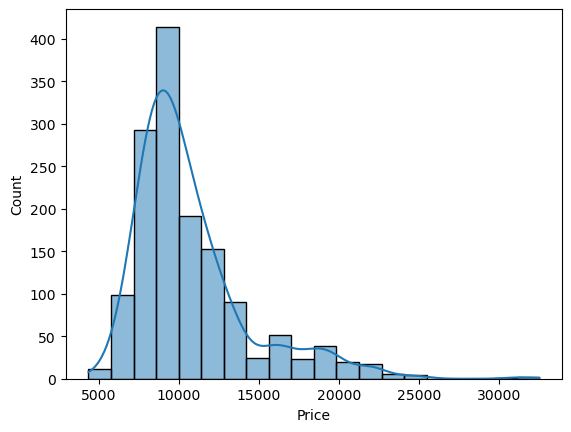

Positive skewness might indicate that while the majority of cars are priced lower, there are a few cars in the dataset with higher-than-average prices.
Understanding the distribution of the target variable is crucial for selecting appropriate modeling techniques and interpreting model results.


In [92]:

# Check the distribution of the target variable
sns.histplot(df["Price"], bins=20, kde=True)
plt.show()

print("Positive skewness might indicate that while the majority of cars are priced lower, there are a few cars in the dataset with higher-than-average prices.\nUnderstanding the distribution of the target variable is crucial for selecting appropriate modeling techniques and interpreting model results.")

In [99]:
#Insight
print("-----------")
print("In the context of the 'Price' variable:\n\t The majority of car prices are concentrated towards the lower end of the scale.\n\t There are relatively few cars with higher prices that contribute to the right tail of the distribution.")

-----------
In the context of the 'Price' variable:
	 The majority of car prices are concentrated towards the lower end of the scale.
	 There are relatively few cars with higher prices that contribute to the right tail of the distribution.


#### Train-Test Split:

In [71]:
# Split the dataset into training and testing sets.

In [72]:
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model=LinearRegression()
model_fit = model.fit(X_train,y_train)
pred1 = model_fit.predict(X_test)
pred1


array([11401.91947089,  8952.37955263,  9073.55311847, ...,
       19931.81111979,  9262.64039159, 11670.16182021])

In [73]:
### Create a predictor column
dd = pd.DataFrame(pred1,columns=['Predctor'])
dd['Actual'] =y_test.values
print(dd.head(4))

       Predctor  Actual
0  11401.919471   10800
1   8952.379553    9950
2   9073.553118    7500
3   9105.329441    9250


#### Model Evaluation

In [74]:
coef = model_fit.coef_
coef

array([-1.16652047e+02, -2.17440305e-02,  4.57577413e+01, -1.67294349e+00,
        9.21139324e+01,  6.56279316e+02,  1.27875956e+01,  1.48292723e+01])

In [75]:
intercept= model_fit.intercept_
round(intercept)

-4013

In [85]:
sqrt_value=sqrt(mean_squared_error(dd['Actual'],dd['Predctor']))
print("Root Mean Squared Error =",round(sqrt_value, 1))
print("---------------------")
print("Interpretation:\n\t The RMSE value of 1542.7 indicates that, on average, the model's predictions deviate from the actual prices by \n\t approximately $1542.7.\n\n\t Lower RMSE values are desirable, as they signify better model performance in minimizing prediction errors.")
print("----------------------")
print("Insight:\n\t While RMSE provides an overall assessment of prediction accuracy, \n\t it's essential to consider the scale of the target variable. \n\n\t In this case, understanding the typical price range of Toyota Corolla cars would provide context for evaluating \n\t the model's performance.")

Root Mean Squared Error = 1542.7
---------------------
Interpretation:
	 The RMSE value of 1542.7 indicates that, on average, the model's predictions deviate from the actual prices by 
	 approximately $1542.7.

	 Lower RMSE values are desirable, as they signify better model performance in minimizing prediction errors.
----------------------
Insight:
	 While RMSE provides an overall assessment of prediction accuracy, 
	 it's essential to consider the scale of the target variable. 

	 In this case, understanding the typical price range of Toyota Corolla cars would provide context for evaluating 
	 the model's performance.


In [89]:
Strength_of_model = r2_score(dd['Actual'],dd['Predctor'])   ### Strength of the model
print("Strength of model: ", round(Strength_of_model,2))
print("---------------------")
print("\n\t The R2-score ranges from 0 to 1, \n\t where 0 indicates that the model does not explain any variability, and 1 indicates perfect prediction.\n\n\t In this case, a score of 0.82 suggests a strong model performance in capturing the patterns and \n\t trends in the data related to car prices.")

Strength of model:  0.82
---------------------

	 The R2-score ranges from 0 to 1, 
	 where 0 indicates that the model does not explain any variability, and 1 indicates perfect prediction.

	 In this case, a score of 0.82 suggests a strong model performance in capturing the patterns and 
	 trends in the data related to car prices.


In [91]:
 #### Saiving the model Using a Joblib
import joblib
filename = 'joblip_multi_reg_model_Pj4.sav'
joblib.dump(model_fit,filename)
#### Loading the Model --
loaded_model = joblib.load(filename)
print(loaded_model)

y_predict = loaded_model.predict(X_test)
y_predict

LinearRegression()


array([11401.91947089,  8952.37955263,  9073.55311847, ...,
       19931.81111979,  9262.64039159, 11670.16182021])